In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset-cap-6/train.csv
/kaggle/input/dataset-cap-6/test.csv
/kaggle/input/dataset-cap-6/gender_submission.csv


**1. Importar as bibliotecas que irão ser utilizadas:**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
np.random.seed(0)


import matplotlib.pyplot as plt
- Importa o módulo pyplot da biblioteca Matplotlib, que é usada para criar gráficos estáticos, interativos e personalizados.

import seaborn as sns
- Importa a biblioteca Seaborn, que é baseada no Matplotlib e oferece uma interface mais elegante para criar gráficos estatísticos.

%matplotlib inline
- Esse é um comando mágico do Jupyter Notebook.
- Faz com que os gráficos gerados pelo Matplotlib sejam exibidos diretamente abaixo da célula de código, dentro do notebook.

np.random.seed(0)
- Define uma semente para o gerador de números aleatórios da biblioteca NumPy.
- Isso garante que os resultados gerados por funções como np.random.rand() ou np.random.normal() sejam reproduzíveis — ou seja, iguais toda vez que o código for executado.
- O número 0 é arbitrário; qualquer inteiro funcionaria.


**2. Transformar arquivos em dataframe e gerar momentos estatísticos:   a. Importar os arquivos “kaggle/input/titanic/test.csv” e “kaggle/input/titanic/train.csv”;   b. Gerar momentos estatísticos sobre o dataframe de treino, utilizando “.describe( )”;**


In [3]:
train_data = pd.read_csv("/kaggle/input/dataset-cap-6/train.csv")
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


train_data = pd.read_csv("/kaggle/input/dataset-cap-6/train.csv")
- Carrega o dataframe

train_data.describe():
- Objetivo: Gerar um resumo estatístico das colunas numéricas do DataFrame.
- Essa função retorna:
- count: número de valores não nulos
- mean: média
- std: desvio padrão
- min: valor mínimo
- 25%, 50%, 75%: quartis
- max: valor máximo



In [4]:
test_data = pd.read_csv("/kaggle/input/dataset-cap-6/test.csv")
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


 
**3. Análise dos dados: a. Identificar as Features do banco de dados que são categóricas (não numéricas), e as que são numéricas. As numéricas, deve-se separá-las em discretas e contínuas. i. Pode-se usar o método “.info( )” para descobrir o tipo de dado de cada Feature.**


**letra a:**

**Para o train_data:**

In [5]:
# Verificar tipos
train_data.info()
# Categóricas
categorical_features = train_data.select_dtypes(include=['object', 'category']).columns.tolist()

# Numéricas
numerical_features = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Discretas e contínuas
discrete_features = [col for col in numerical_features if train_data[col].nunique() < 20]
continuous_features = [col for col in numerical_features if train_data[col].nunique() >= 20]

# Exibir resultados
print("Features categóricas:", categorical_features)
print("Features numéricas:", numerical_features)
print("Numéricas discretas:", discrete_features)
print("Numéricas contínuas:", continuous_features)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Features categóricas: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Features numéricas: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Numéricas discretas: ['Survived', 'Pclass', 'SibSp', 'Parch']
Numéricas contínuas: [

train_data.info()
- Exibe um resumo do DataFrame, incluindo:
- Nome das colunas
- Quantidade de valores não nulos
- Tipo de dado de cada coluna (int64, float64, object, etc.)
- É útil para detectar colunas com valores faltantes e entender a estrutura geral dos dados.

categorical_features = train_data.select_dtypes(include=['object', 'category']).columns.tolist()
- Seleciona colunas cujo tipo é object (strings) ou category (categorias explícitas).
- Essas colunas geralmente representam nomes, rótulos, classificações (ex: sexo, cidade, tipo de produto).

numerical_features = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
- Seleciona colunas com dados numéricos: inteiros (int64) ou decimais (float64).
- São usadas para cálculos estatísticos, gráficos, e modelos preditivos.

discrete_features = [col for col in numerical_features if train_data[col].nunique() < 20]
continuous_features = [col for col in numerical_features if train_data[col].nunique() >= 20]
- Discretas: têm poucos valores únicos (menos de 20). Ex: número de filhos, nota de 0 a 10.
- Contínuas: têm muitos valores únicos. Ex: altura, salário, idade.
Essa separação ajuda a escolher o tipo de gráfico ou técnica estatística mais adequada para cada variável.

print("Features categóricas:", categorical_features)

print("Features numéricas:", numerical_features)

print("Numéricas discretas:", discrete_features)

print("Numéricas contínuas:", continuous_features)
- Mostra na tela as listas de colunas classificadas por tipo.
- Isso facilita a inspeção manual e o planejamento de etapas seguintes como limpeza, visualização ou modelagem.



**Para o test_data:**

In [6]:
# Verificar os tipos de dados
test_data.info()

# Identificar features categóricas
categorical_features_test = test_data.select_dtypes(include=['object', 'category']).columns.tolist()

# Identificar features numéricas
numerical_features_test = test_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Separar numéricas discretas (poucos valores únicos)
discrete_features_test = [col for col in numerical_features_test if test_data[col].nunique() < 20]

# Separar numéricas contínuas (muitos valores únicos)
continuous_features_test = [col for col in numerical_features_test if test_data[col].nunique() >= 20]

# Exibir os resultados
print("Features categóricas (test_data):", categorical_features_test)
print("Features numéricas (test_data):", numerical_features_test)
print("Numéricas discretas (test_data):", discrete_features_test)
print("Numéricas contínuas (test_data):", continuous_features_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
Features categóricas (test_data): ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Features numéricas (test_data): ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Numéricas discretas (test_data): ['Pclass', 'SibSp', 'Parch']
Numéricas contínuas (test_data): ['PassengerId', 'Ag


**b. Descobrir quais as Features contém NaN, além da quantidade desse tipo de dado em cada Feature. i. Pode-se utilizar o comando “DataFrame.isnull.sum( )”.**


**Para o train_data:**

In [7]:
# Contar valores nulos por coluna
missing_values_train = train_data.isnull().sum()

# Filtrar apenas colunas com pelo menos um NaN
missing_values_train = missing_values_train[missing_values_train > 0]

# Exibir resultado
print("Valores nulos em train_data:")
print(missing_values_train)

Valores nulos em train_data:
Age         177
Cabin       687
Embarked      2
dtype: int64


missing_values_train = train_data.isnull().sum()
- train_data.isnull() retorna um DataFrame booleano com True onde há valores nulos (NaN) e False onde não há.
- .sum() soma os True (que são tratados como 1), resultando na quantidade de valores nulos por coluna.
- O resultado é uma Series com o nome da coluna como índice e o número de valores nulos como valor.

missing_values_train = missing_values_train[missing_values_train > 0]
- Aqui, ele está removendo colunas que não têm valores nulos.
- Fica apenas com as colunas onde o número de valores nulos é maior que zero.
- Isso torna a análise mais limpa e focada.

print("Valores nulos em train_data:")
print(missing_values_train)
- Exibe no console uma lista das colunas com valores nulos e a quantidade de nulos em cada uma.
- Isso ajuda a decidir o que fazer: preencher, remover ou investigar os dados faltantes.

**Para o test_data:**

In [8]:
# Contar valores nulos por coluna
missing_values_test = test_data.isnull().sum()

# Filtrar apenas colunas com pelo menos um NaN
missing_values_test = missing_values_test[missing_values_test > 0]

# Exibir resultado
print("Valores nulos em test_data:")
print(missing_values_test)

Valores nulos em test_data:
Age       86
Fare       1
Cabin    327
dtype: int64


 
**c. Deve-se utilizar apenas Features numéricas e retirar as categóricas. Portanto, faça dois novos dataframes, apenas com as features numéricas do banco de dados de treino e de teste.**


In [9]:
# DataFrame com apenas features numéricas do train_data
train_numeric = train_data.select_dtypes(include=['int64', 'float64'])

# DataFrame com apenas features numéricas do test_data
test_numeric = test_data.select_dtypes(include=['int64', 'float64'])

# Exibir os shapes para confirmar
print(f"O DataFrame train_numeric tem {train_numeric.shape[0]} linhas e {train_numeric.shape[1]} colunas numéricas.")
print(f"O DataFrame test_numeric tem {test_numeric.shape[0]} linhas e {test_numeric.shape[1]} colunas numéricas.")

O DataFrame train_numeric tem 891 linhas e 7 colunas numéricas.
O DataFrame test_numeric tem 418 linhas e 6 colunas numéricas.


train_numeric = train_data.select_dtypes(include=['int64', 'float64'])
- Cria um novo DataFrame chamado train_numeric contendo somente as colunas numéricas de train_data.
- select_dtypes(...) é uma função do pandas que permite filtrar colunas com base no tipo de dado.
- Aqui, ele inclui:
- int64: números inteiros
- float64: números decimais

test_numeric = test_data.select_dtypes(include=['int64', 'float64'])
- Faz a mesma coisa que a linha anterior, mas agora com o DataFrame test_data.
- Isso é útil para garantir que os dados de treino e teste estejam consistentes em termos de estrutura numérica.

print(f"O DataFrame train_numeric tem {train_numeric.shape[0]} linhas e {train_numeric.shape[1]} colunas numéricas.")
print(f"O DataFrame test_numeric tem {test_numeric.shape[0]} linhas e {test_numeric.shape[1]} colunas numéricas.")
- .shape retorna uma tupla com (número de linhas, número de colunas).
- Aqui, o código está imprimindo essas dimensões para confirmar que a filtragem foi feita corretamente.

Por que isso é útil?
- Em modelos de machine learning, muitas vezes é necessário trabalhar apenas com variáveis numéricas, especialmente para algoritmos que não lidam bem com texto ou categorias sem pré-processamento.
- Também ajuda a evitar erros ao aplicar normalização, padronização ou cálculos estatísticos.


 
**d. Retire as linhas que contenham NaN das features do banco de dados de treino.  i. Para isso será útil o método DataFrame.dropna( )**


In [10]:
# Remover linhas com qualquer NaN do DataFrame de treino
train_numeric_clean = train_numeric.dropna()

# Exibir o novo shape para confirmar quantas linhas foram removidas
print(f"Linhas e colunas original: {train_numeric.shape}")
print(f"Linhas e colunas após remoção de NaNs: {train_numeric_clean.shape}")

Linhas e colunas original: (891, 7)
Linhas e colunas após remoção de NaNs: (714, 7)


train_numeric_clean = train_numeric.dropna()
- dropna() remove todas as linhas que contêm pelo menos um valor nulo (NaN).
- O resultado é um novo DataFrame chamado train_numeric_clean, que só tem linhas completas — ou seja, sem nenhum valor faltante.
- Isso é útil para evitar problemas em algoritmos que não lidam bem com dados incompletos.

print(f"Linhas e colunas original: {train_numeric.shape}")

print(f"Linhas e colunas após remoção de NaNs: {train_numeric_clean.shape}")
- .shape retorna uma tupla com (número de linhas, número de colunas).
- A primeira linha mostra o tamanho original do DataFrame.
- A segunda mostra o tamanho após a remoção das linhas com NaNs.
- Isso permite ver quantas linhas foram descartadas no processo.



**e. No banco de dados de teste, substitua os NaN pelo valor 0, para que o arquivo de predição tenha o número de linhas exigido pela competição  i.Utilizar o método DataFrame.fillna( )**


In [11]:
#Exibição do Data Frame anterior, usei o head() para não dar erro de formatação:
test_numeric.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,7.8292
1,893,3,47.0,1,0,7.0000
2,894,2,62.0,0,0,9.6875
3,895,3,27.0,0,0,8.6625
4,896,3,22.0,1,1,12.2875


test_numeric.head():
- .head() mostra, por padrão, as 5 primeiras linhas de um DataFrame.
- Isso é útil para inspecionar a estrutura dos dados sem imprimir tudo (o que pode ser enorme e quebrar o formato da saída).


In [12]:
# Substituir todos os NaN por 0
test_numeric_semNaN = test_numeric.fillna(0)
print(test_numeric_semNaN)


     PassengerId  Pclass   Age  SibSp  Parch      Fare
0            892       3  34.5      0      0    7.8292
1            893       3  47.0      1      0    7.0000
2            894       2  62.0      0      0    9.6875
3            895       3  27.0      0      0    8.6625
4            896       3  22.0      1      1   12.2875
..           ...     ...   ...    ...    ...       ...
413         1305       3   0.0      0      0    8.0500
414         1306       1  39.0      0      0  108.9000
415         1307       3  38.5      0      0    7.2500
416         1308       3   0.0      0      0    8.0500
417         1309       3   0.0      1      1   22.3583

[418 rows x 6 columns]


test_numeric_semNaN = test_numeric.fillna(0):
- .fillna(0) procura todos os valores NaN (ausentes) no DataFrame e os troca pelo número 0.
- Cria-se um novo DataFrame (test_numeric_semNaN) com essa modificação, sem alterar o original.

3. Mostrar o resultado
print(test_numeric_semNaN)

- Exibe todo o conteúdo do novo DataFrame já limpo de valores nulos (todos substituídos por zero).

Por que fazer isso?
- Muitos algoritmos e cálculos não aceitam valores ausentes.
- Substituir por zero é rápido e evita erros, mas nem sempre é a melhor escolha — em alguns casos, pode distorcer resultados estatísticos.
- Outras estratégias incluem: preencher com a média, mediana, valor mais frequente ou até valores calculados a partir de outras colunas.


**6.2- Exploração do banco de dados A próxima etapa é a visualização de dados. Para cada Feature serão gerados gráficos que indiquem a probabilidade de sobrevivência do passageiro de acordo com o valor de sua característica. Será utilizado o bar plot do seaborn, já que possibilita este tipo de visualização.  1. Para a Feature “Age” será necessário criar uma nova Feature que a separe em 8 grupos para que se possa utilizar “sns.barplot”. (DICA: Crie um novo dataframe apenas com as informações necessárias para a criação deste gráfico)  a. criar uma lista com os nomes que serão dados aos grupos em que as idades serão repartidas (Exemplo: “(0-10)”, “(10-20)”, ...) ;  b. utilize pandas.cut, para separar as idades em 8 grupos e utilize o argumento “labels” para utilizar a lista dos nomes dos grupos;  c. criar a nova coluna com os grupos, perceba que esta nova coluna será categórica;  d. criar um gráfico que indique a chance de sobrevivência por grupo de idade;  e. faça uma análise a partir da visualização deste gráfico.**


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


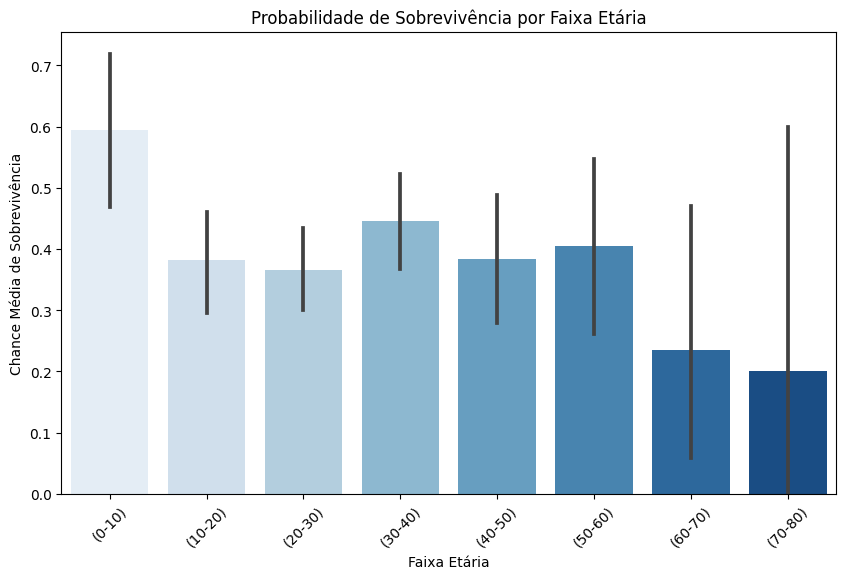

In [13]:
# Lista com os nomes dos grupos de idade
age_labels = ['(0-10)', '(10-20)', '(20-30)', '(30-40)', '(40-50)', '(50-60)', '(60-70)', '(70-80)']

# Criar nova coluna com grupos de idade
train_data.loc[:, 'AgeGroup'] = pd.cut(train_data['Age'], bins=8, labels=age_labels)

# Filtrar apenas linhas com grupo de idade definido (sem NaN)
age_group_data = train_data.dropna(subset=['AgeGroup'])

# Criar gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='Survived', data=age_group_data, palette='Blues')
plt.title('Probabilidade de Sobrevivência por Faixa Etária')
plt.ylabel('Chance Média de Sobrevivência')
plt.xlabel('Faixa Etária')
plt.xticks(rotation=45)
plt.show()

age_labels = ['(0-10)', '(10-20)', '(20-30)', '(30-40)', '(40-50)', '(50-60)', '(60-70)', '(70-80)']:
- Essa lista define os nomes que serão atribuídos às faixas de idade.
- Cada string representa um intervalo de 10 anos.

train_data.loc[:, 'AgeGroup'] = pd.cut(train_data['Age'], bins=8, labels=age_labels):
- pd.cut() divide a coluna Age em 8 faixas de valores (bins).
- Os rótulos definidos em age_labels são atribuídos a cada faixa.
- O resultado é uma nova coluna chamada AgeGroup com valores como (20-30), (30-40) etc.
- loc[:, 'AgeGroup'] garante que a nova coluna seja adicionada corretamente ao DataFrame.

age_group_data = train_data.dropna(subset=['AgeGroup']):
- Remove linhas onde AgeGroup está nulo (provavelmente porque a idade original estava ausente).
- Isso evita que o gráfico inclua dados incompletos.


plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='Survived', data=age_group_data, palette='Blues')
- Cria uma figura com tamanho personalizado.
- sns.barplot() calcula a média da coluna Survived para cada faixa etária.
- Se Survived for binária (0 = não sobreviveu, 1 = sobreviveu), a média representa a probabilidade média de sobrevivência.
- palette='Blues' aplica uma paleta de cores azulada.

plt.title('Probabilidade de Sobrevivência por Faixa Etária')
plt.ylabel('Chance Média de Sobrevivência')
plt.xlabel('Faixa Etária')
plt.xticks(rotation=45)
plt.show()
- Adiciona título e rótulos aos eixos.
- Rotaciona os rótulos do eixo X para facilitar a leitura.
- plt.show() exibe o gráfico.

Resultado:
Um gráfico de barras mostrando, por exemplo, que pessoas entre 20 e 30 anos podem ter tido maior taxa de sobrevivência do que outras faixas — dependendo do contexto do dataset (como o Titanic, por exemplo).

 
**2. Crie gráficos para todas as outras features numéricas discretas, e faça uma análise dos resultados obtidos. Não será necessário produzir um gráfico para a feature “Fare”. Após a criação de cada gráfico será necessário realizar uma breve análise para avaliação do impacto de cada feature na predição.**


**Gráfico Pclass VS Sobrevivência**

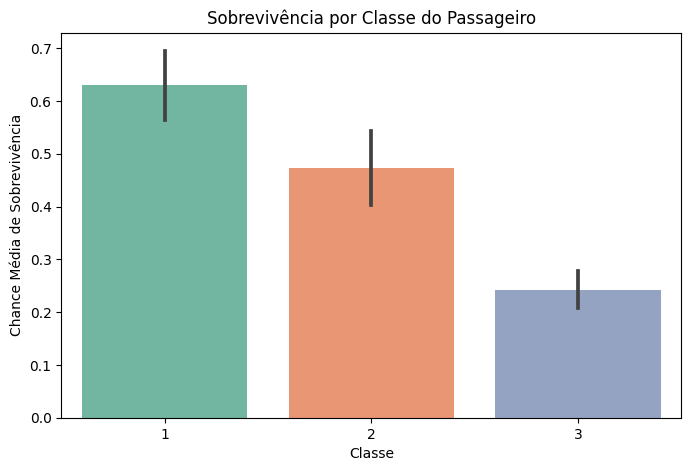

In [14]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Survived', data=train_data, palette='Set2')
plt.title('Sobrevivência por Classe do Passageiro')
plt.ylabel('Chance Média de Sobrevivência')
plt.xlabel('Classe')
plt.show()

plt.figure(figsize=(8, 5)):
- Define o tamanho da figura: 8 polegadas de largura por 5 de altura.
- Isso ajuda a deixar o gráfico mais legível e proporcional.

sns.barplot(x='Pclass', y='Survived', data=train_data, palette='Set2'):
- x='Pclass': o eixo X representa a classe do passageiro (1ª, 2ª ou 3ª classe).
- y='Survived': o eixo Y mostra a média da variável Survived para cada classe.
- Como Survived é binária (0 = não sobreviveu, 1 = sobreviveu), a média representa a chance média de sobrevivência.
- data=train_data: usa os dados do DataFrame train_data.
- palette='Set2': aplica uma paleta de cores suave e agradável.

plt.title('Sobrevivência por Classe do Passageiro')
plt.ylabel('Chance Média de Sobrevivência')
plt.xlabel('Classe')
- Adiciona título e rótulos aos eixos para facilitar a interpretação.

- plt.show()
- Renderiza e exibe o gráfico na tela.

**Análise:**
Passageiros que estavam na primeira classe tiveram maior chance de sobrevivênica.
A terceira classe teve menor chance indicando correlação entre a classe social e a taxa de sobrevivência.
O que mostra que a condição socioeconômica do cidadão influencia no acesso a botes e boias sala vidas.

**Gráfico SibSp VS Sobrevivência**

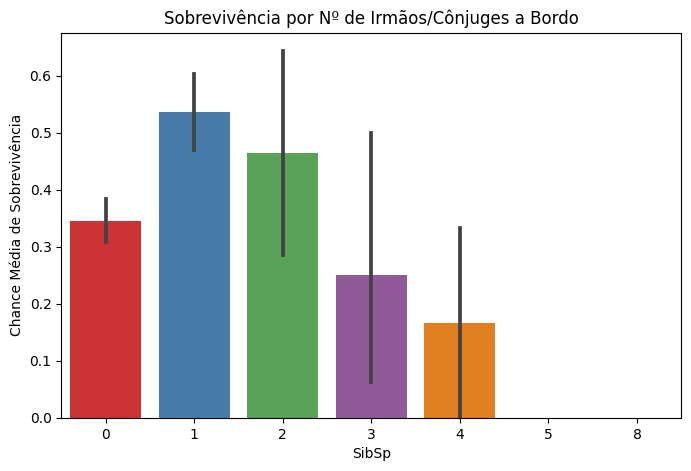

In [15]:
plt.figure(figsize=(8, 5))
sns.barplot(x='SibSp', y='Survived', data=train_data, palette='Set1')
plt.title('Sobrevivência por Nº de Irmãos/Cônjuges a Bordo')
plt.ylabel('Chance Média de Sobrevivência')
plt.xlabel('SibSp')
plt.show()

plt.figure(figsize=(8, 5)):
- Cria uma nova figura com tamanho 8 polegadas de largura por 5 de altura.
- Isso ajuda a deixar o gráfico mais legível e proporcional.

sns.barplot(x='SibSp', y='Survived', data=train_data, palette='Set1'):
- Usa o Seaborn para criar um gráfico de barras.
- x='SibSp': eixo X representa o número de irmãos/cônjuges a bordo.
- y='Survived': eixo Y mostra a média da taxa de sobrevivência para cada valor de SibSp.
- data=train_data: os dados vêm do DataFrame train_data.
- palette='Set1': aplica uma paleta de cores vibrante e distinta.

plt.title('Sobrevivência por Nº de Irmãos/Cônjuges a Bordo'):
- Define o título do gráfico, explicando o que está sendo visualizado.

plt.ylabel('Chance Média de Sobrevivência'):
- Rotula o eixo Y, indicando que os valores representam probabilidades médias (entre 0 e 1).

plt.xlabel('SibSp'):
- Rotula o eixo X com a variável SibSp.

plt.show():
- Exibe o gráfico na tela.

**Análise:**
Passageiros que tinham acompanhates, um ou dois tiveram maior chance de sobrevivênica.
Aqueles que estavam sozinhos ou com muitos acompanhantes tiveram menor chance de sobrevivência.
Isso mostra que estar com menos acompanhantes favorece a sobrevivência.


**Gráfico Parch VS Sobrevivência**

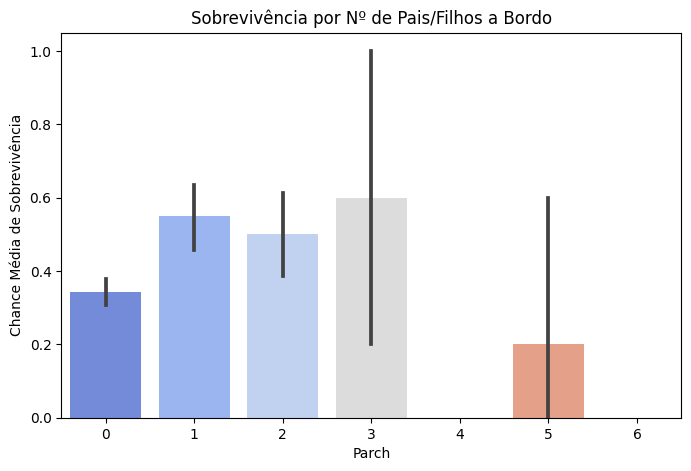

In [16]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Parch', y='Survived', data=train_data, palette='coolwarm')
plt.title('Sobrevivência por Nº de Pais/Filhos a Bordo')
plt.ylabel('Chance Média de Sobrevivência')
plt.xlabel('Parch')
plt.show()

plt.figure(figsize=(8, 5)):
- Cria uma figura de tamanho 8x5 polegadas para o gráfico.

sns.barplot(x='Parch', y='Survived', data=train_data, palette='coolwarm')
- Cria um gráfico de barras usando Seaborn.
- x='Parch': eixo X representa o número de pais/filhos a bordo.
- y='Survived': eixo Y mostra a média da taxa de sobrevivência para cada valor de Parch.
- Como Survived é binária (0 = não sobreviveu, 1 = sobreviveu), a média representa a probabilidade média de sobrevivência.
- palette='coolwarm': usa uma paleta de cores que vai do azul ao vermelho, facilitando a visualização de contrastes.

plt.title('Sobrevivência por Nº de Pais/Filhos a Bordo')
plt.ylabel('Chance Média de Sobrevivência')
plt.xlabel('Parch'):
- Adiciona título e rótulos aos eixos para tornar o gráfico mais informativo.

plt.show():
- Exibe o gráfico na tela.

**Análise:**
Passageiros com 1 a 3 familiares tiveram maiores chances de sobreviver.
Aqueles sozinhos ou com mais de 4 familiares tiveram menores chances de sobrevivência.
Isso mostra que laços familiares moderados promoveram maiores chances do individuo sobreviver.


**Gráfico AgeGroup VS Sobrevivência**

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


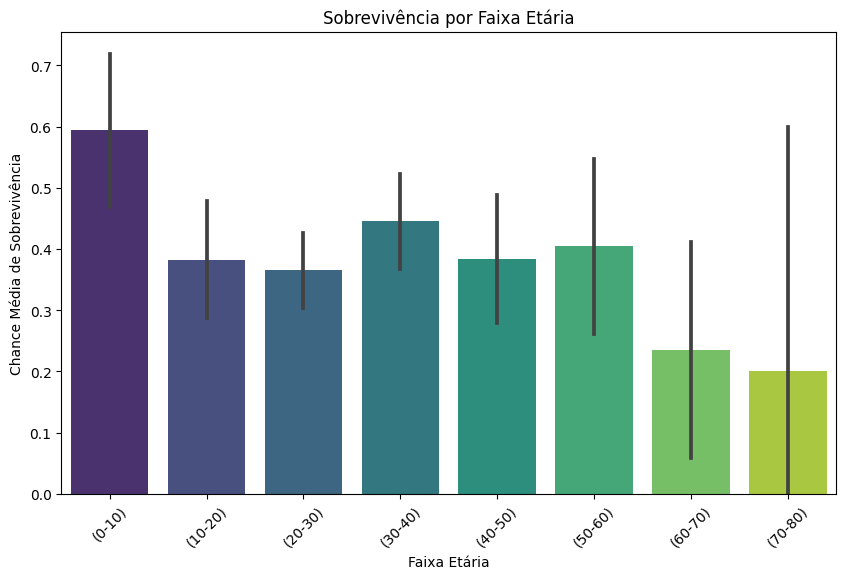

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='Survived', data=train_data, palette='viridis')
plt.title('Sobrevivência por Faixa Etária')
plt.ylabel('Chance Média de Sobrevivência')
plt.xlabel('Faixa Etária')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6)):
- Cria uma figura de tamanho 10x6 polegadas para o gráfico. Isso ajuda a deixá-lo mais legível.

sns.barplot(x='AgeGroup', y='Survived', data=train_data, palette='viridis'):
- Usa o Seaborn para criar um gráfico de barras.
- x='AgeGroup': eixo X mostra as faixas etárias.
- y='Survived': eixo Y mostra a média da taxa de sobrevivência para cada faixa etária.
- Como Survived é binária (0 ou 1), a média representa a chance média de sobrevivência.
- palette='viridis': aplica uma paleta de cores que vai do roxo ao amarelo-esverdeado, ótima para destacar variações.

plt.title('Sobrevivência por Faixa Etária')
plt.ylabel('Chance Média de Sobrevivência')
plt.xlabel('Faixa Etária')
- Adiciona título e rótulos aos eixos para tornar o gráfico mais informativo.

plt.xticks(rotation=45):
- Rotaciona os rótulos do eixo X em 45 graus para evitar sobreposição e facilitar a leitura.

plt.show():
- Exibe o gráfico na tela.

**Análise:**
Crianças tiveram maior chances de sobrevivênica.
Idosos e jovens tiveram menores chances de sobreviver.
Isso mostra que a prioridade de salvamento foi dada as crianças.

**6.3- Treinamento do modelo e submissão das predições**

**1. Separação de banco de dados de treino e validação:
 a. Criar variável X, contendo o banco de dados apenas das Features;
 b. Criar variável y, contendo o target da predição;
 c. Usar Train Test Split para separar treino e validação (DICA: utilizar validação
 com 20%dotamanho do treino);**

In [18]:
from sklearn.model_selection import train_test_split

# Carregar os dados (DataFrame: train_data e test_data)
# Remover a coluna de ID e definir Features e Target
X = train_data.drop(columns=['PassengerId', 'Survived'])
y = train_data['Survived']

# Separar em treino e validação (80% treino, 20% validação)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#Tranformando as variáveis categóricas em numéricas:
X_train = pd.get_dummies(X_train)
X_val = pd.get_dummies(X_val)

#Alinhamento das colunas:
X_train, X_val = X_train.align(X_val, join='left', axis=1, fill_value=0)


from sklearn.model_selection import train_test_split:
- Importa a função train_test_split da biblioteca scikit-learn, usada para dividir os dados em conjuntos de treino e validação.

X = train_data.drop(columns=['PassengerId', 'Survived'])
y = train_data['Survived']
- X: contém todas as features (variáveis independentes), exceto PassengerId (irrelevante para o modelo) e Survived (que é o alvo).
- y: é a variável target, ou seja, o que queremos prever — se o passageiro sobreviveu (1) ou não (0).

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42):
- Divide os dados em:
- X_train, y_train: 80% dos dados para treinar o modelo.
- X_val, y_val: 20% dos dados para validar/testar o modelo.
- random_state=42: garante que a divisão seja reprodutível (sempre igual).

X_train = pd.get_dummies(X_train)
X_val = pd.get_dummies(X_val):
- Converte variáveis categóricas (como Sex, Embarked, etc.) em variáveis numéricas usando one-hot encoding.
- Exemplo: a coluna Sex vira duas colunas: Sex_male e Sex_female, com valores 0 ou 1.

X_train, X_val = X_train.align(X_val, join='left', axis=1, fill_value=0):
- Garante que X_val tenha as mesmas colunas que X_train, mesmo que alguma categoria não tenha aparecido na validação.
- fill_value=0: preenche com zero as colunas ausentes.

Resultado final:
- X_train, y_train: prontos para treinar o modelo.
- X_val, y_val: prontos para avaliar o desempenho do modelo.



**2. Treinamento e validação do modelo:**

 **a. Importar Random Forest Classifier da biblioteca sklearn.ensemble;**
 
 **b. Importar accuracy score da biblioteca sklearn.metrics;**
 
 **c. Treinar random forest com as features e o target de treino;**
 
 **d. Realizar a predição;**
 
 **e. Validar a predição, comparando com o target da validação, utilizando accuracy
 score;**
 
 **f. Avalie se a pontuação é satisfatória.**

In [19]:
#Regularizando os valores de NaN para que o código não dê erro e o random forest funcione:
from sklearn.impute import SimpleImputer

# Criar imputador que substitui NaN por a média (ou mediana, ou 0)
imputer = SimpleImputer(strategy='mean')

# Aplicar no treino e validação
X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)

from sklearn.impute import SimpleImputer:
- Importa a classe SimpleImputer da biblioteca scikit-learn.
- Essa classe é usada para preencher valores ausentes em um DataFrame ou matriz de dados.

imputer = SimpleImputer(strategy='mean'):
- Cria um objeto imputer que vai substituir os valores NaN pela média da coluna correspondente.
- Outras estratégias possíveis: 'median', 'most_frequent', 'constant'.

X_train = imputer.fit_transform(X_train):
- fit_transform() calcula a média de cada coluna com base nos dados de treino (X_train) e substitui os NaNs por esses valores.
- O resultado é uma matriz NumPy com os dados limpos, pronta para ser usada no modelo.

X_val = imputer.transform(X_val):
- Aplica a mesma média calculada no treino para preencher os NaNs no conjunto de validação (X_val).
- Isso garante consistência entre os dados de treino e teste — fundamental para evitar vazamento de informação.

Por que isso é importante?
- Muitos algoritmos, como o Random Forest, não aceitam valores nulos.
- Preencher os NaNs evita erros e melhora a qualidade do modelo.
- Usar a média é uma abordagem simples e eficaz, especialmente quando os dados estão bem distribuídos.

In [20]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Criando e treinando o modelo
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Predições
y_pred = model.predict(X_val)

# Avaliação com accuracy score
accuracy = accuracy_score(y_val, y_pred)
print(f"Acurácia na validação: {accuracy:.4f}")

Acurácia na validação: 0.8101


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score:
- RandomForestClassifier: modelo de aprendizado de máquina baseado em uma coleção de árvores de decisão (ensemble).
- accuracy_score: função que mede a acurácia, ou seja, a proporção de previsões corretas.

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)
- n_estimators=200: o modelo vai criar 200 árvores de decisão. Mais árvores geralmente significam melhor desempenho, até certo ponto.
- random_state=42: garante reprodutibilidade dos resultados. Usar um número fixo faz com que o modelo sempre gere o mesmo resultado.
- fit(X_train, y_train): treina o modelo com os dados de entrada (X_train) e os rótulos (y_train).

y_pred = model.predict(X_val):
- Usa o modelo treinado para prever os rótulos do conjunto de validação (X_val).
- O resultado é um vetor y_pred com as classes previstas.

accuracy = accuracy_score(y_val, y_pred)
print(f"Acurácia na validação: {accuracy:.4f}"):
- Compara as previsões (y_pred) com os rótulos reais (y_val) e calcula a acurácia.
- O :.4f no print formata o número para quatro casas decimais.

 
**3. Gerar predição, salvar a versão e submeter à competição:** 

**a. Treinar novamente o modelo, utilizando o banco de dados completo;** 

**b. Salvar o índice do banco de dados de teste;** 

**c. Gerar uma predição a partir do modelo, sendo a entrar o banco de dados de teste, sem seu índice;** 

**d. Criar um dataframe com o pandas que contenha: os mesmos índices do banco de dados de teste, as predições realizadas (OBS: Olhar arquivo modelo "gender_submission.csv");** 

**e. Transformar este dataframe em um arquivo csv utilizando pandas;** 

**f. Salvar a versão clicando em “Save Version”, selecionar a versão que foi salva e submeter à competição.**


In [21]:
#Correção do NaN que estão no DataFrame para o RandomForest aaceitar os dados:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import pandas as pd

# 1. Preparar os dados
X_full = pd.get_dummies(train_data.drop(columns=['PassengerId', 'Survived']))
y_full = train_data['Survived']

X_test = pd.get_dummies(test_data.drop(columns=['PassengerId']))
X_full, X_test = X_full.align(X_test, join='left', axis=1, fill_value=0)

# 2. Imputar valores ausentes após o alinhamento
imputer = SimpleImputer(strategy='mean')
X_full = imputer.fit_transform(X_full)
X_test = imputer.transform(X_test)

# 3. Treinar o modelo
final_model = RandomForestClassifier(n_estimators=200, random_state=42)
final_model.fit(X_full, y_full)

# 4. Fazer predições
predictions = final_model.predict(X_test)

# 5. Criar DataFrame de submissão
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': predictions
})

# 6. Salvar como CSV
submission.to_csv('submission.csv', index=False)

print('Setup completo, fim do Titanic')

Setup completo, fim do Titanic


X_full = pd.get_dummies(train_data.drop(columns=['PassengerId', 'Survived']))
y_full = train_data['Survived']

X_test = pd.get_dummies(test_data.drop(columns=['PassengerId']))
X_full, X_test = X_full.align(X_test, join='left', axis=1, fill_value=0)
- drop(columns=['PassengerId', 'Survived']): remove colunas irrelevantes para o modelo (PassengerId) e a variável alvo (Survived) do conjunto de treino.
- pd.get_dummies(): transforma variáveis categóricas em numéricas via one-hot encoding.
- align(): garante que X_full e X_test tenham as mesmas colunas, preenchendo com 0 onde necessário. Isso evita erros na hora de fazer previsões.

imputer = SimpleImputer(strategy='mean')
X_full = imputer.fit_transform(X_full)
X_test = imputer.transform(X_test)
- Cria um imputador que substitui valores ausentes (NaN) pela média da coluna.
- fit_transform() aplica isso ao conjunto de treino.
- transform() aplica a mesma lógica ao conjunto de teste, garantindo consistência.

final_model = RandomForestClassifier(n_estimators=200, random_state=42)
final_model.fit(X_full, y_full)
- Cria um modelo de Random Forest com 200 árvores.
- random_state=42 garante que os resultados sejam reprodutíveis.
- fit() treina o modelo com os dados preparados.

predictions = final_model.predict(X_test)
- Usa o modelo treinado para prever a sobrevivência dos passageiros no conjunto de teste.

submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': predictions
})
- Cria um novo DataFrame com os IDs dos passageiros e suas respectivas previsões (Survived).
- Esse formato é exigido para submissão no Kaggle.

submission.to_csv('submission.csv', index=False)
- Salva o DataFrame como um arquivo CSV, pronto para ser enviado ao Kaggle.
- index=False evita que o índice do DataFrame seja incluído no arquivo.

